In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

In [ ]:
digits = load_digits()

x = digits.data
y = digits.target

digits.data.shape, digits.target.shape

((1797, 64), (1797,))

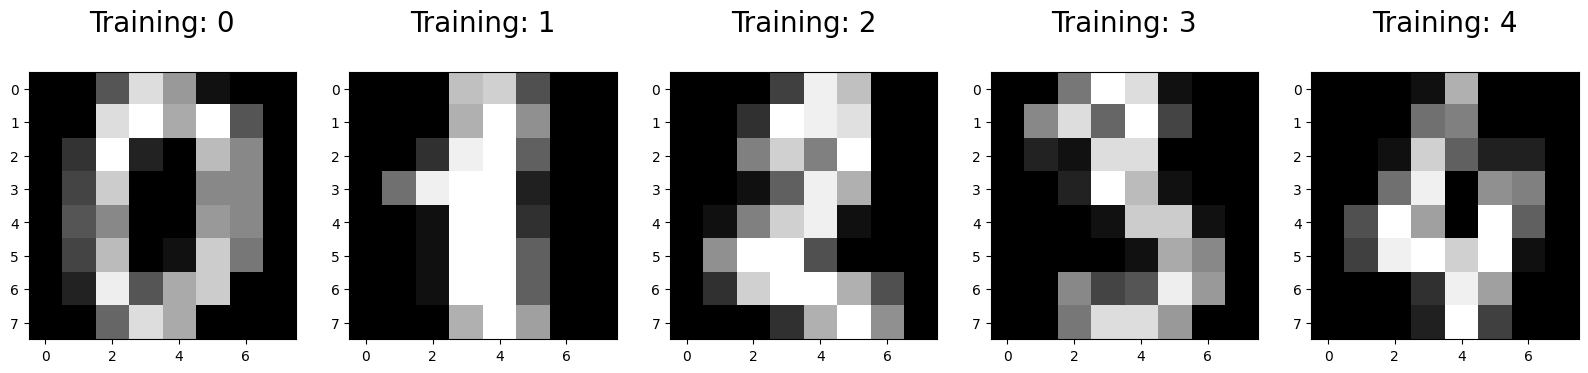

In [ ]:
#simples from dataset
plt.figure(figsize=(20,5))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((1257, 64), (1257,), (540, 64), (540,))

In [ ]:
# Create an SVC classifier
#linear --> Accuracy: 97.96%
#rbf --> Accuracy: 98.89%
svc_model = SVC(kernel="rbf", C=10)

dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)

In [ ]:
svc_model.fit(x_train, y_train) #train model

SVC(C=10)

In [ ]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
y_pred = svc_model.predict(x_test)  # test model
print(f"y_pred =  {y_pred}") #svc

y_pred =  [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 5 5 6 6 0 6 4 3 9 3 7 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 8 8 5 5 1 6 2 8 8 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 5 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 3 5 6 0 0 3 0 5 0 0 4 1
 2 8 4 5 9 6 3 1 8 8 4 2 3 8 9 8 8 5 0 6 3 3 7 1 6 4 1 2 1 1 6 4 7 4 8 3 4
 0 5 1 9 4 5 7 6 3 7 0 5 9 7 5 9 7 4 2 1 9 0 7 5 2 3 6 3 9 6 9 5 0 1 5 5 8
 3 3 6 2 6 5 5 2 0 8 7 3 7 0 2 2 3 5 8 7 3 6 5 9 9 2 9 6 3 0 7 1 1 9 6 1 1
 0 0 2 9 3 9 9 

In [ ]:
print(f"y_test =  {y_test}")

y_test =  [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 7 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 3 9 3 9 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 8 8 5 5 1 6 2 8 8 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 5 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 3 5 6 0 0 3 0 5 0 0 4 1
 2 8 4 5 9 6 3 1 8 8 4 2 3 8 9 8 8 5 0 6 3 3 7 1 6 4 1 2 1 1 6 4 7 4 8 3 4
 0 5 1 9 4 5 7 6 3 7 0 5 9 7 5 9 7 4 2 1 9 0 7 5 3 3 6 3 9 6 9 5 0 1 5 5 8
 3 3 6 2 6 5 5 2 0 8 7 3 7 0 2 2 3 5 8 7 3 6 5 9 9 2 5 6 3 0 7 1 1 9 6 1 1
 0 0 2 9 3 9 9 

In [ ]:
y_pred_dt = dt_model.predict(x_test)  # test model
print(f"y_pred_dt =  {y_pred_dt}") #Decision Tree

y_pred_dt =  [6 9 3 7 2 2 5 3 5 7 2 4 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 5 5 6 0 9 0 0 8 5 4 5 2 4 5 7 0 7 5 9 9 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 9 2 9 4 4 7 4 3 5 3 4 3 5 9 4 2 7
 7 4 2 1 9 2 7 8 3 2 6 9 4 0 3 0 7 5 8 7 5 7 3 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 4 5 6 6 0 6 4 3 9 3 7 7 2 9 0 4 5 8 6 5 7 9 8 4 2 1 1 7 7 2 2 9 9 8 0 3
 3 2 5 6 9 9 4 4 5 4 2 3 6 4 8 5 9 5 7 1 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 9 3 1 3 6 7 1 9 1 4 7 6 5 1 5 5 1 5 8 8 8 9 9 7 4 2 0 2 3 6 8 3
 3 6 0 3 7 4 0 1 0 4 5 1 5 3 6 0 3 1 0 4 3 6 5 9 7 3 5 9 9 9 8 5 3 3 2 0 5
 8 3 4 0 8 4 6 4 3 9 5 0 5 2 1 3 1 4 3 1 7 0 1 5 2 1 3 8 7 0 6 4 8 8 5 1 8
 4 5 9 4 9 5 6 0 3 2 0 9 9 8 9 5 2 7 7 1 8 7 4 3 8 9 5 6 0 0 3 0 5 0 0 4 1
 2 8 4 5 9 6 3 1 8 8 4 1 3 8 9 8 8 5 0 6 3 3 7 1 6 4 2 2 1 1 6 6 9 8 8 3 4
 0 5 9 9 4 5 7 6 9 8 0 5 9 7 5 9 7 4 2 2 9 0 7 5 7 3 6 3 9 6 9 5 0 1 5 5 8
 3 3 6 2 6 5 6 2 0 8 7 3 7 0 2 2 3 5 8 7 3 6 3 9 9 2 5 6 3 0 7 2 1 9 6 9 1
 0 0 2 9 3 7

In [ ]:
accuracy_svc = accuracy_score(y_test, y_pred)
print(f'SVC Accuracy: {accuracy_svc * 100:.2f}%')

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt * 100:.2f}%')

SVC Accuracy: 98.89%
Decision Tree Accuracy: 85.74%


In [ ]:
report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}')

report_dt = classification_report(y_test, y_pred_dt)
print(f'Decision Tree Classification Report:\n{report_dt}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       0.98      1.00      0.99        47
           3       1.00      0.96      0.98        54
           4       1.00      1.00      1.00        60
           5       0.98      0.98      0.98        66
           6       1.00      1.00      1.00        53
           7       0.98      0.98      0.98        55
           8       0.98      1.00      0.99        43
           9       0.97      0.97      0.97        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93        53
           1       0.87      0.78      0.82        50
           2      

In [ ]:
with open("result.txt", "w") as f:
    f.write("SVC Classification Report:\n")
    f.write(report)
    f.write("Decision Tree Classification Report:\n")
    f.write(report_dt)

with open("result.txt", "w") as f:
    f.write(f"SVC Accuracy: {accuracy_svc:.4f}\n")
    f.write("SVC Classification Report:\n\")
    f.write(report)
    f.write("Decision Tree Accuracy: " + str(accuracy_dt) + "\n")
    f.write("\nDecision Tree Classification Report:\n")
    f.write(report_dt)

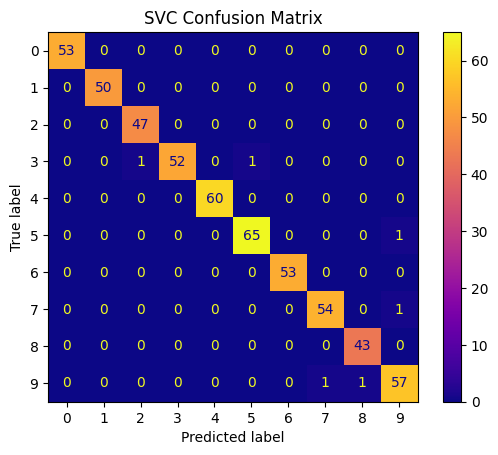

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(svc_model, x_test, y_test, cmap='plasma')

#cm = confusion_matrix(y_test, y_pred)
#sns.heatmap(cm, annot=True, fmt='d', cmap='plasma')
plt.title("SVC Confusion Matrix")
#plt.xlabel("Predicted Label")
#plt.ylabel("True Label")
plt.show()

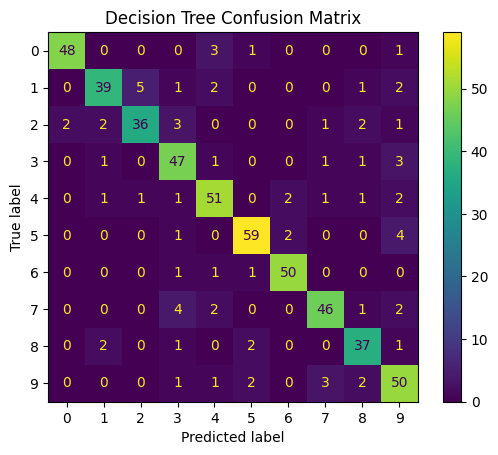

In [ ]:
ConfusionMatrixDisplay.from_estimator(dt_model, x_test, y_test, cmap="viridis")
plt.title("Decision Tree Confusion Matrix")
plt.show()

Now you can run the original cell again to calculate the accuracy.